In [29]:
# import packages 
import os
from skimage import io, img_as_float, img_as_ubyte
#from skimage.io import imsave
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import numpy as np

Total test files:  88


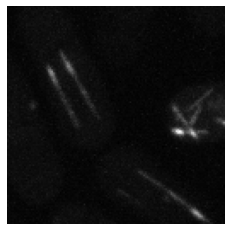

In [30]:
# test images
# paths and filenames 
path = os.getcwd()
path_test_images = path + "\\test_images\\"
file_names_test = os.listdir(path_test_images)
print("Total test files:  {0}".format(len(path_test_images)))
# read in an image form the test files 
img = imread(path_images+file_names[3])
plt.imshow(img, cmap="gray");
plt.axis("off");

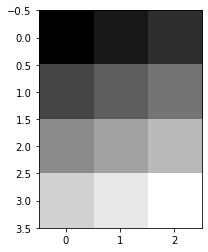

In [31]:
input_array = np.arange(12).reshape(4,3)
plt.imshow(input_array, cmap="gray");

In [32]:
class datAugmentation: 
    def __init__(self, im, title = None):
        self.input = im
        self.title = title 
        self.n_rows = im.shape[0]
        self.n_cols = im.shape[1]
        self.row_range = np.arange(self.n_rows)
        self.row_range_inv = np.flip(self.row_range)
        self.col_range = np.arange(self.n_cols)
        self.col_range_inv = np.flip(self.col_range)
    
    def rotate90(self):
        self.r90 = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.row_range:
            vals = self.input[row,:]
            col_ind = self.row_range_inv[row]
            self.r90[:,col_ind] = vals 

    def rotate180(self):
        self.r180 = np.zeros(self.n_rows*self.n_cols).reshape(self.n_rows, self.n_cols)
        for row in self.row_range: 
            vals = self.input[row,:]
            vals = np.flip(vals)
            row_ind = self.row_range_inv[row]
            self.r180[row_ind,:] = vals

    def rotate270(self):
        self.r270 = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.row_range: 
            vals = self.input[row,:]
            vals = np.flip(vals)
            col_ind = row
            self.r270[:,col_ind] = vals

    def flip_horizontal(self):
        self.flip_horiz = np.zeros(self.n_rows*self.n_cols).reshape(self.n_rows, self.n_cols)
        for row in self.row_range:
            vals = self.input[row,:]
            vals = np.flip(vals)
            self.flip_horiz[row,:] = vals

    def flip_vertical(self):
        self.flip_vert = np.zeros(self.n_rows*self.n_cols).reshape(self.n_rows, self.n_cols)
        for row in self.row_range:
            vals = self.input[row,:]
            row_ind = self.row_range_inv[row]
            self.flip_vert[row_ind,:] = vals
    
    def rotate90_flip_horizontal(self):
        tmp_res = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.row_range:
            vals = self.input[row,:]
            col_ind = self.row_range_inv[row]
            tmp_res[:,col_ind] = vals
        self.rot_flip_horiz = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.col_range:
            vals = tmp_res[row,:]
            vals = np.flip(vals)
            self.rot_flip_horiz[row,:] = vals
        
    def rotate90_flip_vertical(self):
        tmp_res = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.row_range:
            vals = self.input[row,:]
            col_ind = self.row_range_inv[row]
            tmp_res[:,col_ind] = vals
        self.rot_flip_vert = np.zeros(self.n_rows*self.n_cols).reshape(self.n_cols, self.n_rows)
        for row in self.col_range:
            vals = tmp_res[row,:]
            row_ind = self.col_range_inv[row]
            self.rot_flip_vert[row_ind,:] = vals
                
    def show_all_transformations(self):
        subplots = ["input", "r90", "r180", "r270", "flip_horiz", 
                    "flip_vert", "rot_flip_horiz", "rot_flip_vert"]
        plt.figure(figsize=(12,7))
        for i in range(len(subplots)):
            method = subplots[i]
            plt.subplot(2, 4, i+1)
            plt.imshow(getattr(self, method), cmap="gray")
            plt.axis("off")
            plt.title(method)

In [7]:
def write_ims(res_array, title, aug_type, dest_path):
    full_path = dest_path+title+"-"+aug_type+".tif"
    imwrite(full_path, res_array)

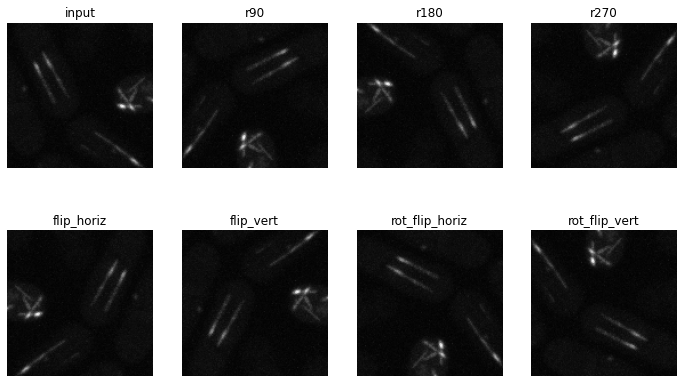

In [33]:
a = datAugmentation(img)
a.rotate90()
a.rotate180()
a.rotate270()
a.flip_vertical()
a.flip_horizontal()
a.rotate90_flip_horizontal()
a.rotate90_flip_vertical()

a.show_all_transformations()

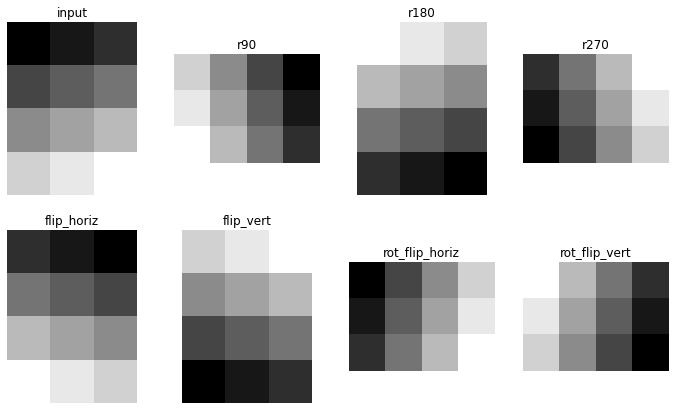

In [34]:
test_array = np.arange(12).reshape(4,3)
b = datAugmentation(test_array)
b.rotate90()
b.rotate180()
b.rotate270()
b.flip_vertical()
b.flip_horizontal()
b.rotate90_flip_horizontal()
b.rotate90_flip_vertical()

b.show_all_transformations()

### Augmenting curated raw/skeletonised data

In [35]:
# paths 
path = os.getcwd()
path_raw_ims = path + "/../rawCurated/"
path_skel_ims = path + "/../skeletonisedCurated/"
dest_raw_ims = path + "/raw/" 
dest_skel_ims = path + "/skeletonised/" 
file_names_raw = os.listdir(path_raw_ims)
file_names_skel = os.listdir(path_skel_ims)
print("Total raw images:           {0}".format(len(file_names_raw)))
print("Total skeletonised images:  {0}".format(len(file_names_skel)))

Total raw images:           128
Total skeletonised images:  128


In [36]:
all_augmentations = ["input", "r90", "r180", "r270", "flip_horiz", 
                     "flip_vert", "rot_flip_horiz", "rot_flip_vert"]

In [37]:
# augment raw images
def augment_and_save(file_names,           # list of file names
                     path_input,           # path to files to be augmented
                     augm_list,            # list of augmentation result names (class attributes)
                     dest_path,            # path to save augmented images
                     d_type = 'float32'):  # output data type          
    for im_ind in range(len(file_names)):
        img = imread(path_input+file_names[im_ind])
        aug = datAugmentation(img, file_names[im_ind])
        aug.rotate90()
        aug.rotate180()
        aug.rotate270()
        aug.flip_vertical()
        aug.flip_horizontal()
        aug.rotate90_flip_horizontal()
        aug.rotate90_flip_vertical()

        for au_t in range(len(augm_list)):
            method = augm_list[au_t]
            filename = aug.title
            filename = filename.split("-")[1].replace(".tif", "")
            tmp_img = getattr(aug, method)
            tmp_img = tmp_img.astype(d_type)
            write_ims(tmp_img, filename, method, dest_path)
    
    print("data augmented and saved.")

In [38]:
augment_and_save(file_names_raw, path_raw_ims, all_augmentations, dest_raw_ims, 'float32')
augment_and_save(file_names_skel, path_skel_ims, all_augmentations, dest_skel_ims, 'bool')

data augmented and saved.
data augmented and saved.
